In [13]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set()

In [14]:
data = pd.read_csv("C:/Users/Vartotojas/Desktop/Machine learning/Linear regression/1.01. Simple linear regression.csv")

In [15]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [16]:
#SAT = critical reading + math + writing
# GPA Grade point average (at graduation from unviversity)
# linear regression which predict GPA based on SAT score obtained

In [17]:

y = data["GPA"]
x1 = data["SAT"]



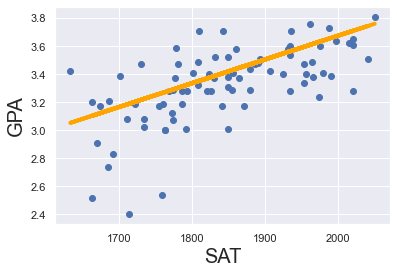

In [24]:
plt.scatter(x1, y)
# according formula yhat = b0 + b1 * x1 (b0 = coef.const from table0.275; b1coef.SAT from table 0.0017,x1 = SAT)
yhat1 = 0.0017*x1 +0.275
fig1 = plt.plot(x1, yhat1, lw=4, c = "orange", label = "regression line")



plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)


plt.show()

In [11]:

#regression itsself
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.20e-11
Time:                        22:01:15   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Multiple linear regression and adjusted R-squared

In [30]:
data2 = pd.read_csv("C:/Users/Vartotojas/Desktop/Machine learning/Linear regression/1.02. Multiple linear regression.csv")

In [31]:
data2.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [34]:
data2.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [35]:
y= data2["GPA"]
x1= data2[["SAT", "Rand 1,2,3"]]

In [38]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

#According adj R-squared we lost value by adding variable. It means it worsens the explanatory power
#R-squred value increased not much. 
# Rand 1,2,3 P value is 0.762 and is not < 0.05. It means Rand 1,2,3 variable is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           6.58e-10
Time:                        06:30:01   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### DUMMY VARIABLES


In [42]:
raw_data = pd.read_csv("C:/Users/Vartotojas/Desktop/Machine learning/Linear regression/1.03. Dummies.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [41]:
nauja_data= raw_data.copy()

In [43]:
nauja_data["Attendance"]=nauja_data["Attendance"].map({"Yes": 1, "No": 0})

In [44]:
nauja_data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [45]:
nauja_data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Reggression

In [47]:

y = nauja_data["GPA"]
x1 = nauja_data[["SAT", "Attendance"]]
#regression itsself
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           2.19e-15
Time:                        06:07:53   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

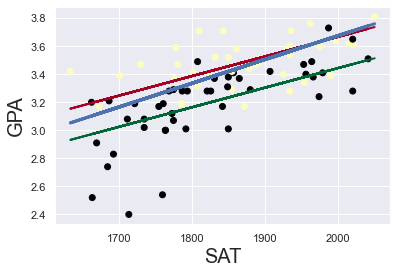

In [63]:
plt.scatter(nauja_data["SAT"], y, c= nauja_data["Attendance"], cmap="magma")
yhat_no = 0.6439 + 0.0014* nauja_data["SAT"]
yhat_yes = 0.8665 +0.0014*nauja_data["SAT"]
fig = plt.plot(data["SAT"], yhat_no, lw=2, c= "#006837", label = "regression_line1")
fig = plt.plot(data["SAT"], yhat_yes, lw=2,c= "#a50026",  label = "regression_line2")
fig = plt.plot(data["SAT"], yhat, lw=3,c= "#4C72B0",  label = "regression_line")

plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

# higher line with students attended the lectures, lower line with students not attended the lectures

### How to make prediction based on thr regressions we create

In [64]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [67]:
new_data = pd.DataFrame({"const":1, "SAT":[1700,1670], "Attendance":[0, 1]})
new_data = new_data[["const", "SAT", "Attendance"]]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [69]:
new_data.rename(index={0:"Bob", 1:"Alice"})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [72]:
predictions=results.predict(new_data)

In [73]:
predictions


0    3.023513
1    3.204163
dtype: float64

In [75]:
predictionsdf = pd.DataFrame({"Predictions":predictions})

joined = new_data.join(predictionsdf)
joined.rename(index={0:"Bob", 1:"Alice"})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
